<a href="https://colab.research.google.com/github/mbalbi/ciencia_de_datos/blob/main/notebooks/practica_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!--NAVIGATION-->
< [Intro a Python y Colab](practica_1.ipynb) | [Tabla de contenidos](../README.md) | [Análisis Exploratorio de Datos](practica_3.ipynb) >

#Clase 2: Probabilidad

El objetivo de la clase de hoy es repasar conceptos de probabilidad, ver cómo trabajar con funciones de densidad de probabilidad en Python, hacer cálculos haciendo uso de las librerías creadas para tal fin, y cómo graficar utilizando matplotlib.

##Versión de Python

In [1]:
!python --version

Python 3.7.13


No debieramos tener problemas con esta versión de Python.

##Funciones de distribución probabilidad

Primero, vamos a hacer un respaso de las distintas funciones de distribución de probabilidad que pueden llegar a aparecer a lo largo del curso de una forma u otra. La definición de una función de distribución de probabilidad es parte importante de la construcción de modelos en base a datos.

###Librerías

Para todo lo que es probabilidad y ploteo vamos a usar las siguientes librerías:
- Numpy para definir la discretización de funciones, generar arrays y demás
- scipy.stats para incorporar las funciones de distribución de probabilidad y sus propiedades
- matplotlib.pyplot para plotear resultados, curvas y todo lo que necesitemos graficar

In [2]:
# Importar librerías
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

###Variables aleatorias discretas

En primer lugar vamos a ver variables que pueden tomar valores discretos. Estos pueden ser ya sea números enteros (por ejemplo, número de tormentas de viento en el año), o categorías (si un evento de viento es un ciclón, un downburst, un tornado, etc.)

####Variables binarias

En primer lugar están las variables aleatorias que pueden tomar únicamente 2 valores. En estos casos se suele trabajar en forma binaria definiendo a uno como `éxito`, `x = 1`, y el caso contrario con `x = 0`, dada una observación o `evento`.

#####Distribución de Bernoulli

Podría describir, por ejemplo, la probabilidad de inundación (`éxito`) dado una tormenta (`evento`).

La distribución queda definida por la variable `p`, la probabilidad de éxito.

$$p(x=k | p ) = p^{k}\left(1-p\right)^\left(1-k\right),\ k=0,1$$

In [5]:
p = 0.4 # probabilidad de exito

# Crear variable aleatoria
inundacion = st.bernoulli(p) # funcion de probabilidad

# Calcular probabilidad para los posibles valores
x = [0,1] # valores que puede tomar la VA
dist = inundacion.pmf(x) # evaluar funcion
print(x,dist)

[0, 1] [0.6 0.4]


Grafiquemos la función de distribución usando Matplotlib. Primero, a lo bruto:



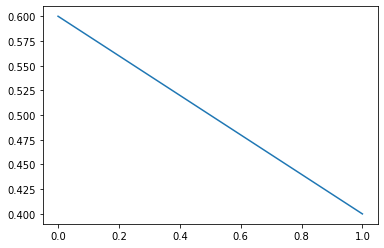

In [6]:
# Grafico elemental
fig = plt.figure() # iniciar figura
plt.plot(x, dist) # agregar ploteo (linea)
plt.show() # mostrar

Teniendo en cuenta que la función toma sólo dos valores (discretos) dibujarlo como recta no es la mejor opción. Probemos con un gráfico de barras.

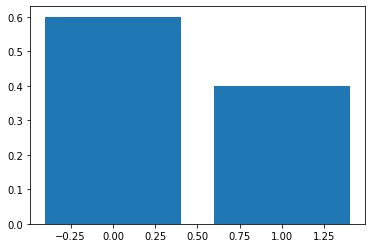

In [7]:
# Gráfico de barras
fig = plt.figure() # iniciar figura
plt.bar(x, dist) # agregar ploteo
plt.show() # mostrar

La verdad que el gráfico hecho así no dice nada, aunque ya se va entendiendo un poco más. La figura puede ser tanto más agradable como querramos incorporando nombres, títulos y formateando los ejes y marcas.

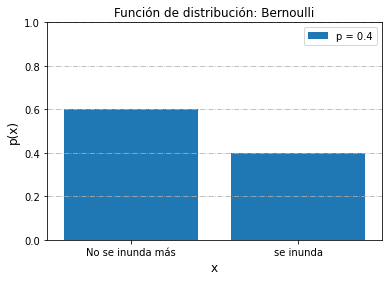

In [20]:
# Crear figura
fig = plt.figure()

# Incorporar el ploteo, agregandole un label
plt.bar(x, dist, label='p = {}'.format(p))

# Agregar nombre de los ejes
plt.xlabel('x', fontsize=12)
plt.ylabel('p(x)', fontsize=12)

# Elegir qué marcar en los ejes, dar nombres categóricos (por ej)
plt.xticks([0, 1],['No se inunda más','se inunda'],rotation=0)

# Marcar límites del gráfico
plt.ylim([0,1.])
plt.xlim([-0.5,1.5])

# Ubicar las leyendas
plt.legend(loc=1)

# Marcar la grilla
plt.grid(linestyle='-.',axis='y')

# Agregar titulo
plt.title('Función de distribución: Bernoulli')

# Ploteo
plt.show()

¡Ya va queriendo un poco más! Aprovechando las capacidades de matplotlib, comparemos cómo varían las funciones de distribución con la variable `p`.

Para esto, vamos a crear varias funciones primero e incluirlas en una lista, y luego graficaremos en un loop. Para que se vean las barras tendremos que correrlas manualmente.

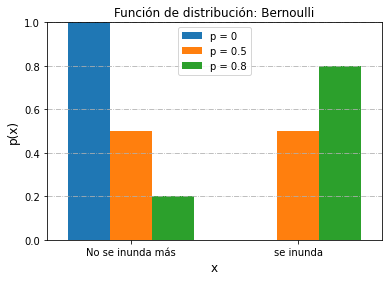

In [25]:
p = [0, 0.5, 0.8] # Distintos 'p' a comparar

# Crear los modelos
Modelos = []
for pval in p:
  Modelos.append(st.bernoulli(pval))

# Iniciar figura
fig3 = plt.figure()

# proponer un ancho de las barras
width = 0.25

# iterar por los distintos modelos
for idx, pval in enumerate(p):
  offset = ((-len(p)+1)/2+idx)*width # Offset para mover las barras
  xvals = np.array(x) + offset # ubicación de las barras
  vals = Modelos[idx].pmf(x) # Evaluar modelos

  # agregar a la figura
  plt.bar(xvals, vals, width, label='p = {}'.format(pval))

# Poner linda la figura como antes
plt.xlabel('x', fontsize=12)
plt.ylabel('p(x)', fontsize=12)
plt.xticks([0, 1],['No se inunda más','se inunda'],rotation=0)
plt.ylim([0,1.])
plt.xlim([-0.5,1.5])
plt.legend(loc=9)
plt.grid(linestyle='-.',axis='y')
plt.title('Función de distribución: Bernoulli')
plt.show()

#####Distribución Binomial

Es efectivamente la extensión de la distribución de Bernoulli para la repeticicón de eventos independientes entre sí, lo que se conoce como un proceso de Bernoulli. Queda definida por 2 variables, la probabilidad de éxito dado un evento `p` y el número de eventos `n`. Se puede demostrar que la distribución de Bernoulli es el caso particular de una binomial con `n=1`.

La función define entonces la probabilidad de `x` éxitos (de `0` a `n`) dado `n` eventos (por ejemplo, la probabilidad de que se inunde 2 veces dado 3 tormentas). El resultado es entonces un conteo (suma) del caso anterior repetido `n` veces en forma independiente.

$$p(x=k | p, n ) = \begin{pmatrix} n \\ k \end{pmatrix} p^{k}\left(1-p\right)^\left(n-k\right),\ k=0,1,\dots,n$$

range(0, 4) [0.125 0.375 0.375 0.125]


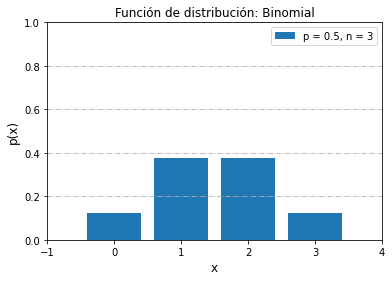

In [26]:
p = 0.5 # probabilidad de exito
n = 3   # numero de eventos
inunda = st.binom(n, p) # funcion de probabilidad

x = range(n+1) # valores que puede tomar la VA
dist = inunda.pmf(x) # evaluar funcion
print(x,dist)

fig = plt.figure()
# Agregar marcas en los datos, crear leyenda
plt.bar(x, dist, label='p = {}'.format(p) + ', n = {}'.format(n))
# Agregar nombre de los ejes
plt.xlabel('x', fontsize=12)
plt.ylabel('p(x)', fontsize=12)
# Marcar límites
plt.ylim([0,1.])
plt.xlim([-1,n+1])
# Ubicar las leyendas
plt.legend(loc=1)
# Marcar la grilla
plt.grid(linestyle='-.',axis='y')
# Agregar titulo
plt.title('Función de distribución: Binomial')
# Ploteo
plt.show()

Veamos entonces la función de distribución y comparemos como varia cambiando n y p en dos gráficos distintos, con la función de subplots

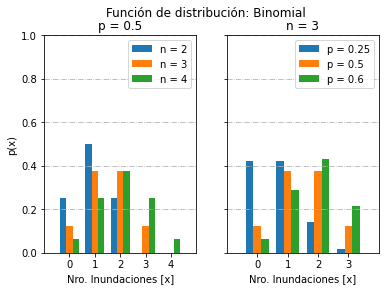

In [27]:
# Crear figura con 2 subfiguras dispuestas en columnas
fig4, ax = plt.subplots(1,2, sharey = True)

# Armar modelos para distintos 'n'
p = 0.5
n = [2, 3, 4]
x = range(n[-1]+1)
Modelo_n = []
for nval in n:
  Modelo_n.append(st.binom(nval,p))

# ancho de las barras
width=0.25

# Graficar en primera subfigura
for idx,nval in enumerate(n):
  offset = ((-len(n)+1)/2+idx)*width # Offset para mover las barras
  xvals = np.array(x) + offset # ubicación de las barras
  vals = Modelo_n[idx].pmf(x) # Evaluar modelos

  # agregar a la figura
  ax[0].bar(xvals, vals, width, label='n = {}'.format(nval))

# Poner linda la subfigura
ax[0].set(xlabel='Nro. Inundaciones [x]',ylabel='p(x)')
ax[0].set_xticks(range(n[-1]+1))
ax[0].set_ylim([0,1.])
ax[0].set_xlim([-1,n[-1]+1])
ax[0].legend(loc=1)
ax[0].grid(linestyle='-.',axis='y')
ax[0].set(title='p = {}'.format(p))

# Armar modelos para distintos 'p'
p = [0.25, 0.5, 0.6]
n = 3
Modelo_p = []
for pval in p:
  Modelo_p.append(st.binom(n,pval))

# Graficar en primera subfigura
for idx,pval in enumerate(p):
  offset = ((-len(p)+1)/2+idx)*width # Offset para mover las barras
  xvals = np.array(x) + offset # ubicación de las barras
  vals = Modelo_p[idx].pmf(x) # Evaluar modelos

  # agregar a la figura
  ax[1].bar(xvals, vals, width, label='p = {}'.format(pval))

# Poner linda la subfigura
ax[1].set(xlabel='Nro. Inundaciones [x]')
ax[1].set_xticks(range(n+1))
ax[1].set_xlim([-1,n+1])
ax[1].legend(loc=1)
ax[1].grid(linestyle='-.',axis='y')
ax[1].set(title='n = {}'.format(n))

plt.suptitle('Función de distribución: Binomial')
plt.show()

Con el fin de identificar tendencias, podría ser valioso graficarlo como variable continua (interpolando entre los valores).

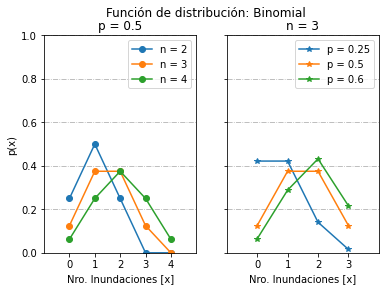

In [41]:
# Crear figura con 2 subfiguras dispuestas en columnas
fig4, ax = plt.subplots(1,2, sharey = True)

# Armar modelos para distintos 'n'
p = 0.5
n = [2, 3, 4]
x = range(n[-1]+1)

# Graficar en primera subfigura
for idx,nval in enumerate(n):
  vals = Modelo_n[idx].pmf(x) # Evaluar modelos

  # agregar a la figura
  ax[0].plot(x, vals, '-o', label='n = {}'.format(nval))

# Poner linda la subfigura
ax[0].set(xlabel='Nro. Inundaciones [x]',ylabel='p(x)')
ax[0].set_xticks(range(n[-1]+1))
ax[0].set_ylim([0,1.])
ax[0].set_xlim([-1,n[-1]+1])
ax[0].legend(loc=1)
ax[0].grid(linestyle='-.',axis='y')
ax[0].set(title='p = {}'.format(p))

# Armar modelos para distintos 'p'
p = [0.25, 0.5, 0.6]
n = 3
x = range(n+1)

# Graficar en primera subfigura
for idx,pval in enumerate(p):
  vals = Modelo_p[idx].pmf(x) # Evaluar modelos

  # agregar a la figura
  ax[1].plot(x, vals, '-*',label='p = {}'.format(pval))

# Poner linda la subfigura
ax[1].set(xlabel='Nro. Inundaciones [x]')
ax[1].set_xticks(range(n+1))
ax[1].set_xlim([-1,n+1])
ax[1].legend(loc=1)
ax[1].grid(linestyle='-.',axis='y')
ax[1].set(title='n = {}'.format(n))

plt.suptitle('Función de distribución: Binomial')
plt.show()

Y que pasa con muchos eventos?

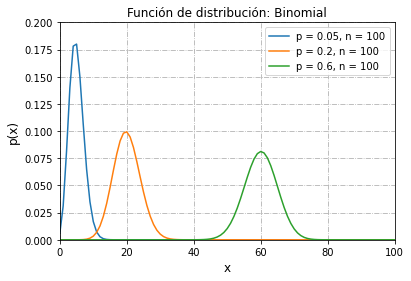

In [42]:
p = [0.05, 0.2, 0.6] # probabilidad de exito
n = 100   # numero de eventos
x = range(n+1)

# Crear Modelos
Modelos = []
for pval in p:
  Modelos.append(st.binom(n,pval))

# Iniciar figura
fig = plt.figure()
# Agregar marcas en los datos, crear leyenda
for idx,pval in enumerate(p):
  #evaluar modelo
  dist = Modelos[idx].pmf(x)
  #agregar al gráfico
  plt.plot(x,dist,'-',label='p = {}'.format(pval) + ', n = {}'.format(n))

# Poner linda la figura
plt.xlabel('x', fontsize=12)
plt.ylabel('p(x)', fontsize=12)
plt.ylim([0,.2])
plt.xlim([0,n])
plt.legend(loc=1)
plt.grid(linestyle='-.',axis='both')
plt.title('Función de distribución: Binomial')

# Ploteo
plt.show()

Se empiezan a parecer a funciones de variable continua, ¿no? Es más, se puede demostrar que los casos `p=0.2` y `p=0.6` tienden a comportarse como variable aleatoria normal cuando `n` tiende a infinito.

¿A qué tiende el primer caso? Lo vamos a ver a continuación

#####Distribución de Poisson

La distribución de poisson es muy similar a la binomial. Así como la primera cuenta el número de éxitos o sucesos en un número de eventos, la distribución de poisson realiza el mismo conteo en dentro de un tiempo o espacio acotado. Es decir, pasa de tener un número de eventos discreto a un intervalo continuo.

Esto hace que se reduzca el número de parámetros del modelo, pasando de 2 (probabilidad de suceso y número de eventos) a 1 (el valor esperado de sucesos). Noten que ahora los valores posibles no estan acotados, `x` puede ir de 0 a infinto, pero siguen siendo números enteros.

La función de poisson se la utiliza habitualmente para modelar la ocurrencia de eventos extremos, como por ejemplo el número de sismos de magnitud dañina en la vida útil o período de diseño de una estructura.

$$p(x=k | \lambda) = \frac{e^{-\lambda}\lambda^{k}}{k!},\ k=0,1,2\dots$$

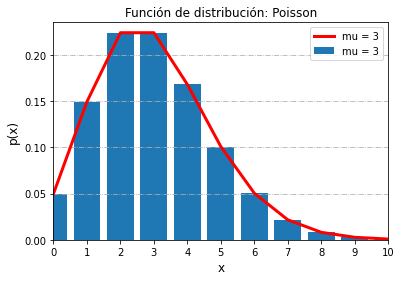

In [43]:
# Crear modelo
mu = 3 # valor esperado de sucesos
inunda = st.poisson(mu) # funcion de probabilidad

# evaluar modelo
x = range(10+1) # Tomar un número arbitrariamente alto
dist = inunda.pmf(x)

#Iniciar figura
fig = plt.figure()
# Mostrar como barras y como función continua
plt.bar(x, dist, label='mu = {}'.format(mu))
plt.plot(x, dist, 'r-',lw=3, label='mu = {}'.format(mu))

# poner linda la figura
plt.xlabel('x', fontsize=12)
plt.ylabel('p(x)', fontsize=12)
plt.ylim(0)
plt.xticks(x)
plt.xlim([0,x[-1]])
plt.legend(loc=1)
plt.grid(linestyle='-.',axis='y')
plt.title('Función de distribución: Poisson')
# Ploteo
plt.show()

Aumentar el valor de mu implica aumentar la esperanza de sucesos (reduciendo el tiempo promedio entre ellos), corriendo la curva hacia la derecha y reduciendo el valor del pico.

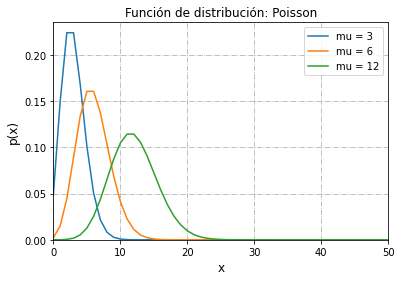

In [44]:
fig = plt.figure()
mu = [3, 6, 12]

Modelo = []
for muval in mu:
  Modelo.append(st.poisson(muval)) # funcion de probabilidad

x = range(51)
for idx,muval in enumerate(mu):
  vals = Modelo[idx].pmf(x)
  plt.plot(x, vals, '-', label='mu = {}'.format(muval))

# Poner lindo el grafico
plt.xlabel('x', fontsize=12)
plt.ylabel('p(x)', fontsize=12)
plt.ylim(0)
plt.xlim([0,x[-1]])
plt.legend(loc=1)
plt.grid(linestyle='-.',axis='both')
plt.title('Función de distribución: Poisson')
# Ploteo
plt.show()

######Relación con la Binomial

Se puede demostrar que la distribución binomial tiende a una distribución de poisson con `mu = n*p` cuando `n` tiende a infinito y `p` tiende a 0. En la práctica, esto es valido para valores de `p` menores a `0.1` y `n` mayor a `30`

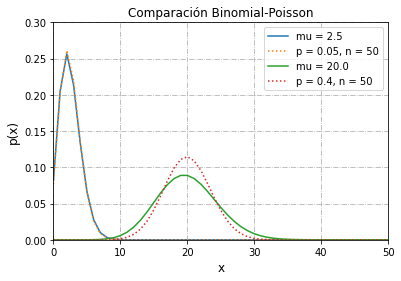

In [45]:
n = 50
p = [0.05, 0.4]

# Crear modelos de poisson y binomial
POI, BIN, mu = [], [], []
for pval in p:
  mu.append(n*pval)
  POI.append(st.poisson(mu[-1]))
  BIN.append(st.binom(n,pval))

x = range(n+1)
# Iniciar figura
fig = plt.figure()
for idx,pval in enumerate(p):
  distpoi = POI[idx].pmf(x) # evaluar
  plt.plot(x, distpoi, '-', label='mu = {}'.format(mu[idx]))

  distbin = BIN[idx].pmf(x)
  plt.plot(x, distbin, ':', label='p = {}'.format(pval) + ', n = {}'.format(n))

# Poner linda la figura
plt.xlabel('x', fontsize=12)
plt.ylabel('p(x)', fontsize=12)
plt.ylim([0,0.30])
plt.xlim([0,n])
plt.legend(loc=1)
plt.grid(linestyle='-.',axis='both')
plt.title('Comparación Binomial-Poisson')
# Ploteo
plt.show()

Cómo se ve arriba, las curvas se parecen para valores bajos de p (menores a 0.1). Esto es muy útil porque permite simplificar el modelo al pasar de 2 parámetros a ajustar a uno solo que es el producto de ambos, que además es más fácil de estimar en una campaña de medición para ciertos procesos naturales.

Para valores mayores de p, la función binomial se asemeja más a una distribución normal (la distribución de poisson no logra ajustar el desvío).


####Variables categóricas

Cuando la variable aleatoria puede tomar ante un evento más de un valor (e.g.: 3, 4, un número acotado de resultados) entonces la variable es categórica. Un ejemplo de variable categórica sería los tipos de falla en un puente dado su colapso.

Scipy no tiene un modelo de distribución categórica incluida en la librería, pero a fines prácticas no es realmente necesaria y fácil de reemplazar.

$$p(x_{i}=k | \mathbf{p} ) = p_{i}^{k}\left(1-p_{i}\right)^\left(1-k\right),\ k=0,1$$

$$\sum p_{i} = 1$$

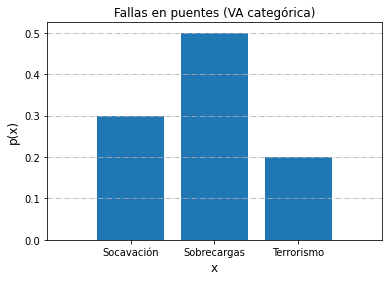

In [46]:
p = [0.3, 0.5, 0.2] # probabilidad de resultados 1, 2, 3
p = np.array(p)/np.sum(np.array(p)) # Asegurar que la suma de 1
x = range(len(p))

fig2 = plt.figure()
plt.bar(x, p)
plt.xlabel('x', fontsize=12)
plt.ylabel('p(x)', fontsize=12)
plt.xticks([0, 1,2],['Socavación', 'Sobrecargas', 'Terrorismo'],rotation=0)
plt.ylim(0)
plt.xlim([-1,len(p)])
plt.grid(linestyle='-.',axis='y')
plt.title('Fallas en puentes (VA categórica)')
plt.show()

#####Distribución multinomial

La distribución multinomial es la extensión de la distribución binomial para variables categóricas (es decir, hace un conteo de resultados para n eventos, con la diferencia de que en cada evento puede haber más de 2 resultados posibles).

Como no es posible gráficar la distribución de probabilidad si se tienen más de 2 resultados, se mostrará un ejemplo que degenera en una distribución binomial. Se aprovechará para mostrar cómo hacer ploteos de barras en 3D.

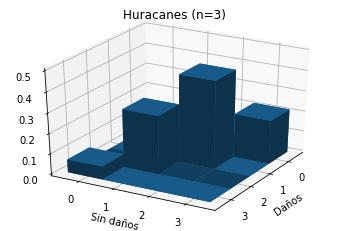

In [48]:
n = 3 # numero de eventos
p = [0.4, 0.6] # probabilidad de resultados 1, 2, la suma da 1.
# Crear modelo
Falla = st.multinomial(n,p)

# Crear la grilla de valores para cada conteo ('x', 'y')
# rango de valores a considerar
xpos = np.arange(0,4,1)
ypos = np.arange(0,4,1)
# crear un mesh con todas las combinaciones
xpos, ypos = np.meshgrid(xpos,ypos)
# Convertir de matrices a vector
xpos = xpos.flatten()
ypos = ypos.flatten()

# Crear la matriz combinando 'x' e 'y'
XY = np.transpose(np.array([xpos,ypos]))
# Evaluar función de distribución
dist = Falla.pmf(XY)

# Iniciar figura, indicar que es en 3D
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.view_init(30,30) # Setear la vista

# Agregar barras 3D, con offsets para centrarlas
N = len(xpos)
ax.bar3d(xpos-0.5,ypos-0.5,np.zeros(N),np.ones(N),np.ones(N),dist)
ax.set_xticks(range(n+1))
ax.set_yticks(range(n+1))
ax.set_zticks(np.linspace(0,0.5,6))
ax.set_xlabel('Daños')
ax.set_ylabel('Sin daños')
ax.set_title('Huracanes (n=3)')
plt.show()

###Variables continuas

Sigamos ahora con funciones de probabilidad para variables que puedan tomar cualquier valor dentro de un rango continuo. En la caso anterior  graficacor funciones de masa, ya que la probabilidad está concentrada en valores epecíficos. Ahora que las variables son continuas, estaremos hablando de funciones de densidad de probabilidad.

####Distribución normal

Bueno, la más conocida de todas! Por el Teorema Central del Limite un gran número de variables terminan convergiendo a una variable aleatoria normal. En general la usamos para modelar la distribuciones la variación de valores en una muestra del mismo proceso (la altura de las personas, la resistencia del hormigón elaborado en planta). Queda definida por su valor medio `mu` y su desvío estandar `sigma`.

$$p(x | \mu, \sigma) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{2}}$$

Cuando la media es 0 y el desvío 1 se habla de una distribución normal normalizada.

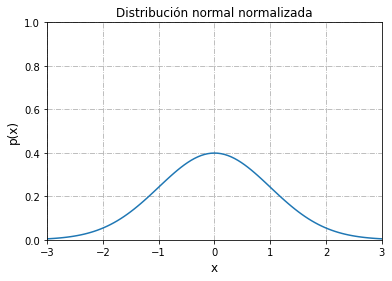

In [49]:
#Los parámetros de la distribución:loc = media, scale = desvío estándar
mu = 0
sigma = 1
Modelo = st.norm(mu,sigma)

# Valores a evaluar
x = np.linspace(-3,3,101)
dist = Modelo.pdf(x)

fig2 = plt.figure()
plt.plot(x, dist)
plt.xlabel('x', fontsize=12)
plt.ylabel('p(x)', fontsize=12)
plt.ylim([0,1])
plt.xlim([x[0],x[-1]])
plt.grid(linestyle='-.',axis='both')
plt.title('Distribución normal normalizada')
plt.show()

Veamos entonces cuál es la influencia de los parámetros de la distribución.

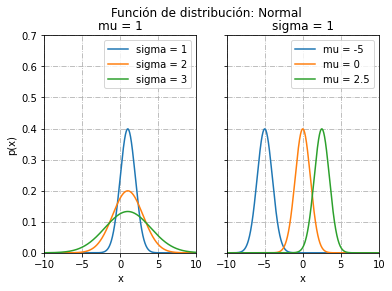

In [50]:
# Crear figura con 2 subfiguras dispuestas en columnas
fig4, ax = plt.subplots(1,2, sharey = True)

x = np.linspace(-10,10,1001)
# Armar modelos para distintos 'sigma'
mu = 1
sigma = [1, 2, 3]
Modelo_mu = []
for sval in sigma:
  Modelo_mu.append(st.norm(mu,sval))

# Graficar en primera subfigura
for idx,sval in enumerate(sigma):
  vals = Modelo_mu[idx].pdf(x) # Evaluar modelos

  # agregar a la figura
  ax[0].plot(x, vals, label='sigma = {}'.format(sval))

# Poner linda la subfigura
ax[0].set(xlabel='x',ylabel='p(x)')
ax[0].set_ylim([0,0.7])
ax[0].set_xlim([x[0],x[-1]])
ax[0].legend(loc=1)
ax[0].grid(linestyle='-.',axis='both')
ax[0].set(title='mu = {}'.format(mu))

# Armar modelos para distintos 'mu'
mu = [-5, 0, 2.5]
sigma = 1
Modelo_s = []
for mval in mu:
  Modelo_s.append(st.norm(mval,sigma))

# Graficar en primera subfigura
for idx,mval in enumerate(mu):
  vals = Modelo_s[idx].pdf(x) # Evaluar modelos

  # agregar a la figura
  ax[1].plot(x, vals, label='mu = {}'.format(mval))

# Poner linda la subfigura
ax[1].set(xlabel='x')
ax[1].set_xlim([x[0],x[-1]])
ax[1].legend(loc=1)
ax[1].grid(linestyle='-.',axis='both')
ax[1].set(title='sigma = {}'.format(sigma))

plt.suptitle('Función de distribución: Normal')
plt.show()

####Distribución lognormal

si la variable `x` tiene una distribución normal, entonces la variable `y = ln(x)` sigue una dsitrbución lognormal, que suele ser utilizada para funciones de distribución de extremos. Por ejemplo, los mm de precipation en una lluvia puede seguir una distribución aproximadamente normal, mientras que la máxima lluvia en mm en un período de tiempo sigue una distribución aproximadamente lognormal.

$$p(x|m,s) = \frac{1}{x s \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{\ln{x}-m}{s}\right)^{2}},\ x\geq0$$

Los parámetros de la distribución lognormal son en principio 2: la forma `s` (igual al desvio estandar de la distribucion normal) y la mediana `m`.

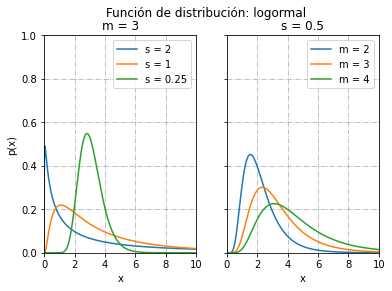

In [52]:
# Crear figura con 2 subfiguras dispuestas en columnas
fig4, ax = plt.subplots(1,2, sharey = True)

x = np.linspace(0,10,1001)
# Armar modelos para distintos 'sigma'
mu = 3
sigma = [2, 1, 0.25]
Modelo_mu = []
for sval in sigma:
  Modelo_mu.append(st.lognorm(sval,0,mu))

# Graficar en primera subfigura
for idx,sval in enumerate(sigma):
  vals = Modelo_mu[idx].pdf(x) # Evaluar modelos

  # agregar a la figura
  ax[0].plot(x, vals, label='s = {}'.format(sval))

# Poner linda la subfigura
ax[0].set(xlabel='x',ylabel='p(x)')
ax[0].set_ylim([0,1])
ax[0].set_xlim([x[0],x[-1]])
ax[0].legend(loc=1)
ax[0].grid(linestyle='-.',axis='both')
ax[0].set(title='m = {}'.format(mu))

# Armar modelos para distintos 'mu'
mu = [2, 3, 4]
sigma = 0.5
Modelo_s = []
for mval in mu:
  Modelo_s.append(st.lognorm(sigma,0,mval))

# Graficar en primera subfigura
for idx,mval in enumerate(mu):
  vals = Modelo_s[idx].pdf(x) # Evaluar modelos

  # agregar a la figura
  ax[1].plot(x, vals, label='m = {}'.format(mval))

# Poner linda la subfigura
ax[1].set(xlabel='x')
ax[1].set_xlim([x[0],x[-1]])
ax[1].legend(loc=1)
ax[1].grid(linestyle='-.',axis='both')
ax[1].set(title='s = {}'.format(sigma))

plt.suptitle('Función de distribución: logormal')
plt.show()

La distribución lognormal está en general definida entre 0 e infinito, pero es posible correr el espacio de la variable:

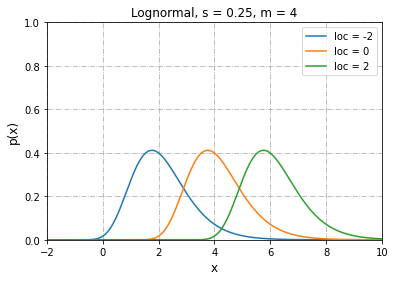

In [53]:
m = 4
s = 0.25
loc = [-2, 0, 2]

Modelo = []
for locs in loc:
  Modelo.append(st.lognorm(s,locs,m))

fig = plt.figure()

# Valores a evaluar
x = np.linspace(-2,10,1201)
for idx, locs in enumerate(loc):
  dist = Modelo[idx].pdf(x)
  plt.plot(x, dist,label='loc = {}'.format(locs))

plt.xlabel('x', fontsize=12)
plt.ylabel('p(x)', fontsize=12)
plt.ylim([0,1])
plt.xlim([x[0],x[-1]])
plt.grid(linestyle='-.',axis='both')
plt.legend(loc=1)
plt.title('Lognormal, s = {}'.format(s) + ', m = {}'.format(m))
plt.show()

####Distribución exponencial

Se llama así porque la función de densidad de probabilidad es una exponencial negativa. Queda definida por el parámetro `lambda` y va, en general, de 0 a infinito, aunque es posible hacer un corrimiento igual que para el caso lognormal.

$$p(x|\lambda) = \lambda e^{-\lambda x},\ x\geq=0$$

Se suele usar para mediciones de tiempo (por ejemplo, el tiempo entre pasos de autos podría ser modelado por una distribución exponencial)

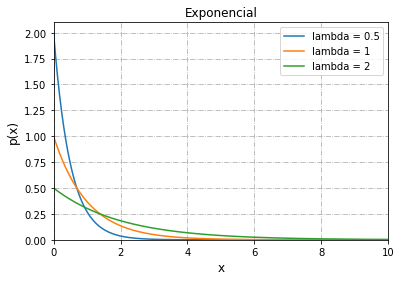

In [54]:
lam = [0.5, 1, 2]

Modelo = []
for l in lam:
  Modelo.append(st.expon(0,l))

fig = plt.figure()

# Valores a evaluar
x = np.linspace(0,10,1001)
for idx, l in enumerate(lam):
  dist = Modelo[idx].pdf(x)
  plt.plot(x, dist,label='lambda = {}'.format(l))

plt.xlabel('x', fontsize=12)
plt.ylabel('p(x)', fontsize=12)
plt.ylim(0)
plt.xlim([x[0],x[-1]])
plt.grid(linestyle='-.',axis='both')
plt.legend(loc=1)
plt.title('Exponencial')
plt.show()

Como comentario, vean que una función de densidad de probabilidad puede tener valores mayores a 1, a diferencia de las funciones de masa para variables discretas.

####Distribución uniforme

Asume que la variable puede tomar con igual probabilidad cualquier valor dentro del intervalo [a, b]. Se la utiliza mucho para samplear muestras de variables, como punto de partida para la inferencia estadística, o para modelar errores de medición.

$$p(x|a,b) = \frac{1}{b-a},\ a\leq x \leq b$$

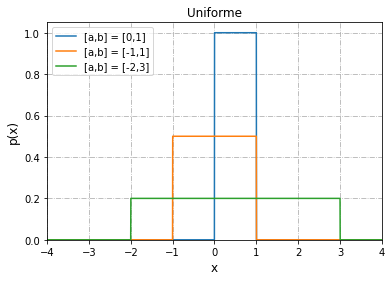

In [55]:
ab = np.array([[0,1],[-1,1],[-2,3]])

Modelo = []
for i in range(ab.shape[0]):
  Modelo.append(st.uniform(ab[i,0],ab[i,1]-ab[i,0]))

fig = plt.figure()

# Valores a evaluar
x = np.linspace(-4,4,4001)
for idx in range(len(Modelo)):
  dist = Modelo[idx].pdf(x)
  plt.plot(x, dist,label='[a,b] = [{}'.format(ab[idx,0]) + 
           ',{}'.format(ab[idx,1]) + ']')

plt.xlabel('x', fontsize=12)
plt.ylabel('p(x)', fontsize=12)
plt.ylim(0)
plt.xlim([x[0],x[-1]])
plt.grid(linestyle='-.',axis='both')
plt.legend(loc=2)
plt.title('Uniforme')
plt.show()

####Distribución Beta

Otra función muy útil es la distribución Beta por su enorme flexibilidad y capacidad de tomar distintas formas, proveyendo también soluciones análiticas a distintos problemas de probabilidad y estadística.

La distribución aplica a variables entre 0 y 1, aunque se la puede escalar y desplazar según fuera necesario.

Sus dos variables son `a` y `b`, y según su relación se pueden obtener todo tipo de funciones:

$$p(x|a,b) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}x^{a-1}(1-x)^{b-1},\ 0\leq x\leq 1$$

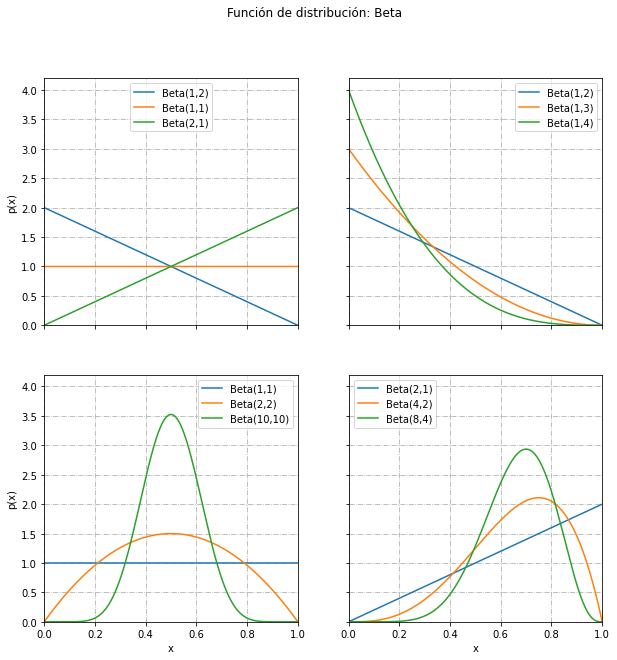

In [60]:
x = np.linspace(0, 1, 10001)

# Lineal
ab = [[1,2],[1,1],[2,1]]
Y = []
for abs in ab:
  Y.append(st.beta(abs[0],abs[1]))

# Hacia un lado
ab2 = [[1,2],[1,3],[1,4]]
Y2 = []
for abs in ab2:
  Y2.append(st.beta(abs[0],abs[1]))

# Centrado
ab3 = [[1,1],[2,2],[10,10]]
Y3 = []
for abs in ab3:
  Y3.append(st.beta(abs[0],abs[1]))

# Combinacion
ab4 = [[2,1],[4,2],[8,4]]
Y4 = []
for abs in ab4:
  Y4.append(st.beta(abs[0],abs[1]))

fig4, ax = plt.subplots(2,2, figsize=(10,10), sharey = True, sharex = True)

for idx,abs in enumerate(ab):
  dist = Y[idx].pdf(x)
  ax[0,0].plot(x,dist,label='Beta({}'.format(abs[0]) + ',{}'.format(abs[1]) + ')')

for idx,abs in enumerate(ab2):
  dist = Y2[idx].pdf(x)
  ax[0,1].plot(x,dist,label='Beta({}'.format(abs[0]) + ',{}'.format(abs[1]) + ')')

for idx,abs in enumerate(ab3):
  dist = Y3[idx].pdf(x)
  ax[1,0].plot(x,dist,label='Beta({}'.format(abs[0]) + ',{}'.format(abs[1]) + ')')

for idx,abs in enumerate(ab4):
  dist = Y4[idx].pdf(x)
  ax[1,1].plot(x,dist,label='Beta({}'.format(abs[0]) + ',{}'.format(abs[1]) + ')')

# Labels
ax[0,0].set(ylabel='p(x)')
ax[1,0].set(ylabel='p(x)', xlabel='x')
ax[1,1].set(xlabel='x')

# Comun a todos
ax[0,0].set_xlim([x[0],x[-1]])
ax[0,0].set_ylim(0)

ax[0,0].grid(linestyle='-.',axis='both')
ax[0,0].legend(loc=9)
ax[0,1].grid(linestyle='-.',axis='both')
ax[0,1].legend(loc=1)
ax[1,0].grid(linestyle='-.',axis='both')
ax[1,0].legend(loc=1)
ax[1,1].grid(linestyle='-.',axis='both')
ax[1,1].legend(loc=2)

plt.suptitle('Función de distribución: Beta')
plt.show()

####Distribución Normal multivariada

#####Esperanza de un vector aleatorio y Matriz de covariancias
Consideremos un vector aleatorio $X$. Su *esperanza* se define componente a componente, y es un nuevo vector (no aleatorio)

$$X=\begin{pmatrix}
X_{1} \\
X_{2} \\
\ldots  \\
X_{n}
\end{pmatrix}\in \mathbb{R} ^{n}\Rightarrow \mu_x = E\left[ X\right] =\begin{pmatrix}
E\left[ X_{1}\right]  \\
E\left[ X_{2}\right]  \\
\ldots  \\
E\left[ X_{n}\right] 
\end{pmatrix}\in \mathbb{R} ^{n}$$

Definimos su *matriz de covariancias* $\Sigma =\Sigma_x=Cov$  por $\Sigma _{ij}=Cov\left( X_{i},X_{j}\right) $

$$\Sigma_x=Cov\left( X\right) = \begin{pmatrix}
Cov\left( X_{1},X_{1}\right)  & Cov\left( X_{1}X_{2}\right)  & \ldots  & Cov\left( X_{1},X_{n}\right)  \\
Cov\left( X_{2},X_{1}\right)  & Cov\left( X_{1},X_{2}\right)  & \ldots  & Cov\left( X_{2},X_{n}\right)  \\
\ldots  &  &  &  \\
Cov\left( X_{n},X_{1}\right)  & Cov\left( X_{n},X_{2}\right)  & \ldots  & Cov\left( X_{n},X_{n}\right) 
\end{pmatrix} \in \mathbb{R} ^{n\times n}$$

Notamos que es una *matriz simétrica.* Tambien podemos decir 

$$Cov\left( X\right) =E\left[ ( X-\mu_x )\cdot \left( X-\mu _{x}\right) ^{t}\right] $$

Notemos que en la diagonal de la matriz de covariancias $Cov(X)$ aparecen las variancias:

$$\sigma _{x_{i}}^{2}=Cov(X_i,X_i)=Var(X_i)$$

Otra observación interesante es que si las componentes del vector X son independientes, entonces serán no correlacionadas:

$Cov(X_i,X_j)=0$ si $i\neq j$ por lo que la matriz $Cov(X)$ será diagonal.

Ejemplo: si $X$ es un vector con componentes $X_{i}\sim N\left( 0,1\right) $ independientes su densidad conjunta vendrá dada por

$$f\left( x\right) =\prod ^{n}_{i=1}\dfrac{1}{\sqrt{2\pi }}e^{-x_{i}^{2}/2}=\dfrac{1}{\left( 2\pi \right) ^{n/2}} e^{-\left| \left| x\right| \right| ^{2}/2}$$

Siendo
$$E\left[ X\right] =\overrightarrow{O}, \quad Cov\left( X\right) =I$$

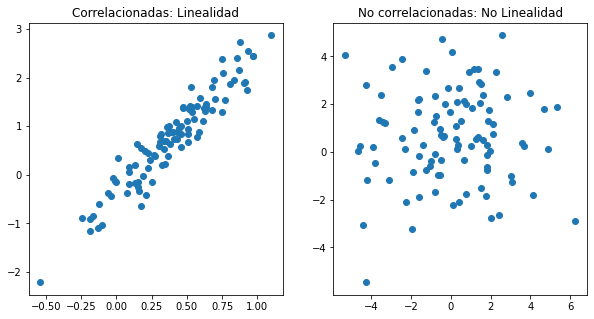

In [61]:
from scipy.stats import multivariate_normal

#Parámetros
mean = np.array([0.4,0.8])
cov_1 = np.array([[0.1, 0.3], [0.3, 1.0]])
cov_2 = np.array([[5, 0], [0, 3]])

#Variables aleatorias 
x_1 = multivariate_normal.rvs(mean, cov_1, 100)
x_2 = multivariate_normal.rvs(mean, cov_2, 100)

#Gráfico de puntos
fig, axs = plt.subplots(1, 2, figsize=(10,5))

axs[0].scatter(x_1[:,0],x_1[:,1])
axs[0].set_title('Correlacionadas: Linealidad')

axs[1].scatter(x_2[:,0],x_2[:,1])
axs[1].set_title('No correlacionadas: No Linealidad')

plt.show()

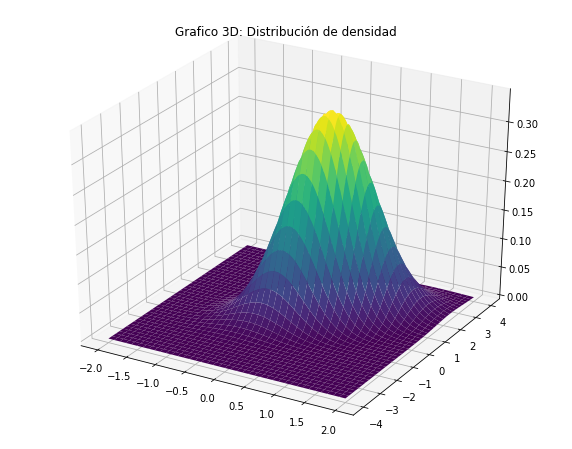

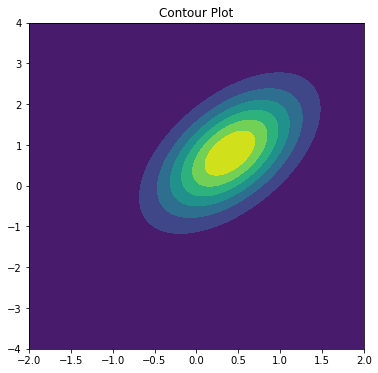

In [68]:
x = np.linspace(-2, 2, 201)
y = np.linspace(-4, 4, 201)

#Los pares ordenados (x, y) a evaluar
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

mean = np.array([0.4,0.8])
cov = np.array([[0.3, 0.3], [0.3, 1.0]])

#mean = np.array([1, 2])
#cov = np.array([[.5, .25],[.25, .5]])

#rv = multivariate_normal(mu, cov)
#Z = rv.pdf(pos)
Z = st.multivariate_normal.pdf(pos, mean, cov)

#Realizo un gráfico 3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title('Grafico 3D: Distribución de densidad')
fig.show()

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot()
ax.contourf(X, Y, Z, cmap='viridis')
ax.set_title('Contour Plot')
ax.set_ylim([-4,4])
fig.show()

##Otras herramientas de Scipy

Hasta ahora hemos visto la "forma" de las distintas disistribuciones en terminos de ya sea su funcion de masa o densidad de probabilidad (dependiendo de si las variables son discretas o continuas). Veamos entonces qué otras herramientas tenemos a nuestro alcance.

###Funcion de probabilidad acumulada

Por un lado están las funciones de probabilidad acumulada, que me indican la probabilidad de que la variable aleatoria tome un valor menor o igual a un valor X. Estas funciones están acotadas entre 0 y 1 y son siempre crecientes. Se puede ver que la probabilidad acumulada es la integral de la función de densidad/masa.

$$P(x\leq X) = \int_{-\infty}^{X} p(x)\ dx$$

Veamos un ejemplo para cada tipo de variable aleatoria.

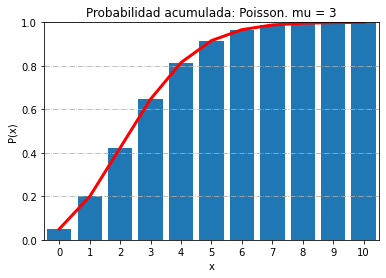

In [71]:
#Poisson
mu = 3
model = st.poisson(mu)

x = range(11)
dist = model.cdf(x)

fig = plt.figure()

plt.bar(x,dist)
plt.plot(x,dist,'r-',lw=3)

plt.ylim([0,1])
plt.xlim([x[0]-0.5,x[-1]+0.5])
plt.xticks(x)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.grid(linestyle='-.',axis='y')
plt.title('Probabilidad acumulada: Poisson. mu = {}'.format(mu))
plt.show()

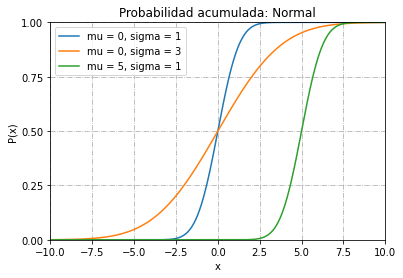

In [73]:
#Normal
ms = [[0,1],[0,3],[5,1]]

model = []
for mss in ms:
  model.append(st.norm(mss[0],mss[1]))

x = np.linspace(-10,10,1301)

fig = plt.figure()

for idx,mss in enumerate(ms):
  dist = model[idx].cdf(x)
  plt.plot(x,dist,label='mu = {}'.format(mss[0]) + ', sigma = {}'.format(mss[1]))

plt.ylim([0,1])
plt.xlim(x[0],x[-1])
plt.xlabel('x')
plt.ylabel('P(x)')
plt.grid(linestyle='-.',axis='both')
plt.legend(loc=2)
plt.yticks(np.linspace(0,1,5))
plt.title('Probabilidad acumulada: Normal')
plt.show()

###Cálculo de probabilidad y función inversa

Hacer cuentas con scipy es también sencillo e igual para cualquier distribución que propongamos. Por ejemplo, tomemos el último caso (variable aleatoria normal con media 5 y desvio 1).

La proabilidad de que x<=5.4 será:

In [74]:
print(model[-1].cdf(5.4))

0.6554217416103243


Del mismo modo se puede usar la función inversa para definir intervalos de confianza, por ejemplo, el rango de valores que cubren el 94%:

In [75]:
print(model[-1].ppf([0.02,0.98]))

[2.94625109 7.05374891]


O para calcular la mediana:

In [76]:
print('mediana',model[-1].ppf(0.5))

mediana 5.0


Cada función de probabilidad guarda a su vez los parámetros más importantes de la distribución, en particular la media, el desvio estandar y la mediana.

Veamoslo para el caso de la función exponencial con `lambda=5`.

In [78]:
lam = 5
Model = st.expon(lam)

print('media:', Model.mean())
print('desvio:', Model.std())
print('mediana:', Model.median())
print('intervalo de confianza 0.9:', Model.interval(0.9))

media: 6.0
desvio: 1.0
mediana: 5.693147180559945
intervalo de confianza 0.9: (5.05129329438755, 7.99573227355399)


###Histogramas y estadísticas poblacionales

En la gran mayoría de los casos vamos a tener datos - overvaciones de una variable aleatoria - y no la función de distribución de probabilidad. Se vuelve interesante entonces ver como construir o, al menos, visualizar la distribución de las observaciones, su probabilidad acumulada, y calcular sus descriptores estadísticos (media, desvio, etc.).

A modo de ejemplo vamos a ver esto generando observaciones de una función de distribución lognormal (es igual para todas las distribuciones).

In [79]:
s, m = 0.25, 3
Model = st.lognorm(s,0,m)

n = 200 # Cantidad de numeros
Dataset = Model.rvs(size=n)

print('Datos:', Dataset.shape)

Datos: (200,)


Ahora haremos uso de un histograma para ver cómo se distribuyen los valores sampleados. Para ello necesitamos definir en número de bins (ventanas) para agrupar los valores.

Tanto valores bajos como altos no permiten discernir la forma de la distribución, con valores bajos introduciendo bias y valores muy altos siendo sensibles al ruido.

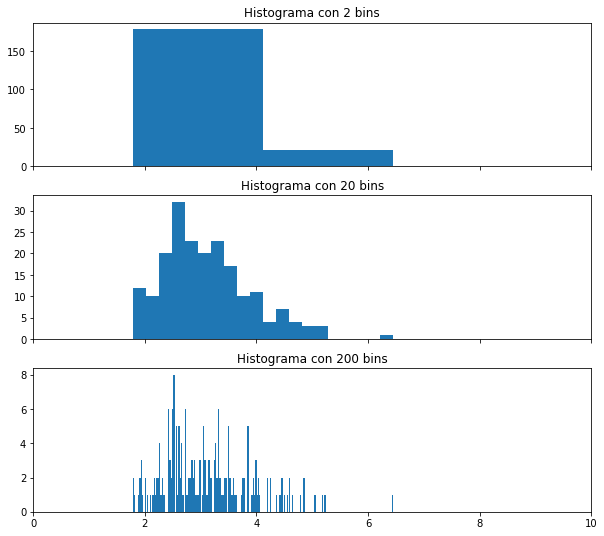

In [80]:
fig, axs = plt.subplots(3, 1, figsize=(10,9), sharex=True)

axs[0].hist(Dataset, bins=2)
axs[0].set_title('Histograma con 2 bins')

axs[1].hist(Dataset, bins=20)
axs[1].set_title('Histograma con 20 bins')

axs[2].hist(Dataset, bins=200)
axs[2].set_title('Histograma con 200 bins')
axs[0].set_xlim([0,10])

plt.show()

Existe un número óptimo de bins que es función del número de muestras... o en realidad, se han propuesta varias reglas de almacenero. Por ejemplo, la regla de Sturge

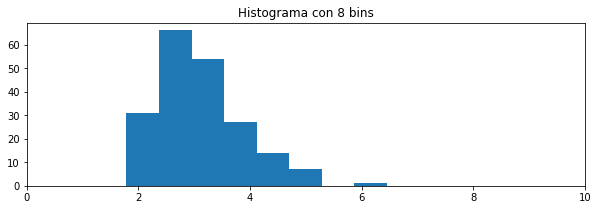

In [81]:
from math import log2
nbins = int(log2(n)+1) # Regla de Sturge

fig = plt.figure(figsize=(10,3))
plt.hist(Dataset, bins=nbins)
plt.title('Histograma con {} bins'.format(nbins))
plt.xlim([0,10])

plt.show()

No deja de ser una ayuda para visualizar. 

Más útil es tal vez, trazar la curva de probabilidad acumulada, que no es más que un conteo de cuántos valores de la muestra superan distintos valores. 

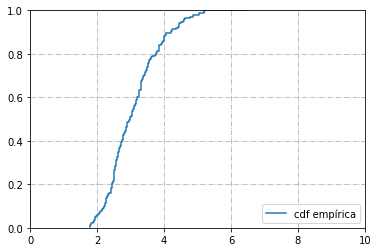

In [84]:
# Quedarse con los valores distintos del dataset, y ordenarlos de menor a mayor
UniData = np.sort(np.unique(Dataset))
UniData = np.reshape(UniData,(1,-1))

# Rescribir el dataset en forma de filas
Data = np.reshape(Dataset,(-1,1))

# Calcular cuantos valores del Dataset se encuentran por debajo de cada valor de
# UniData
CDF = np.sum(Data<=UniData,0)/len(Data)
xdata = np.reshape(UniData,(-1,))

# Graficar función empírica como función escalonada
plt.step(xdata,CDF,label = 'cdf empírica')
plt.xlim([0,10])
plt.ylim([0,1])
plt.grid(linestyle='-.', axis='both')
plt.legend(loc=4)
plt.show()

Comparemos con la función que dio origen a los datos. Debieran dar muy parecido

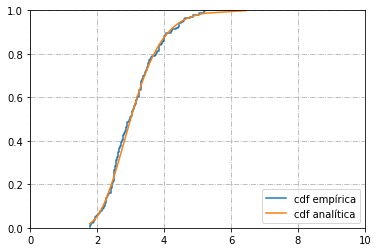

In [85]:
# Graficar función empírica como función escalonada
plt.step(xdata,CDF,label = 'cdf empírica')
plt.plot(xdata,Model.cdf(xdata),label='cdf analítica')
plt.xlim([0,10])
plt.ylim([0,1])
plt.grid(linestyle='-.', axis='both')
plt.legend(loc=4)
plt.show()

Mientras más datos tenga menor variación habrá entre realizaciones y mejor serán también los resultados vs la solución exacta (si existe).

Datos: (2000,)


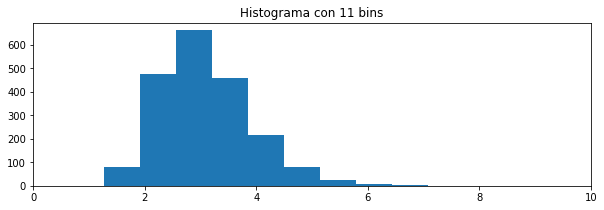

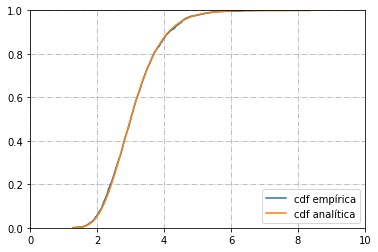

In [91]:
n = 2000 # Cantidad de numeros
Dataset = Model.rvs(size=n)

print('Datos:', Dataset.shape)

nbins = int(log2(n)+1) # Regla de Sturge

fig = plt.figure(figsize=(10,3))
plt.hist(Dataset, bins=nbins)
plt.title('Histograma con {} bins'.format(nbins))
plt.xlim([0,10])

plt.show()

# Quedarse con los valores distintos del dataset, y ordenarlos de menor a mayor
UniData = np.sort(np.unique(Dataset))
UniData = np.reshape(UniData,(1,-1))

# Rescribir el dataset en forma de columnas
Data = np.reshape(Dataset,(-1,1))

# Calcular cuantos valores del Dataset se encuentran por debajo de cada valor de
# UniData
CDF = np.sum(Data<=UniData,0)/len(Data)
xdata = np.reshape(UniData,(-1,))

# Graficar función empírica como función escalonada
plt.step(xdata,CDF,label = 'cdf empírica')
plt.plot(xdata,Model.cdf(xdata),label='cdf analítica')
plt.xlim([0,10])
plt.ylim([0,1])
plt.grid(linestyle='-.', axis='both')
plt.legend(loc=4)
plt.show()

Con la simulación se puede también calcular cualquier otro parámetro o probabilidad que nos interese. Por ejemplo, la probabilidad de que x<=5 es:

In [92]:
# Probabilidad empírica
P5 = np.sum(Dataset<=5)/len(Dataset)
print('empirica', P5)

# Probabilidad 'analítica'
print('analítica', Model.cdf(5))

empirica 0.978
analítica 0.979488748616238


Y del mismo modo calcular media, desvío estandar u otra propiedad de interés

In [94]:
# Media empírica
mu = np.mean(Dataset)
print('media empirica', mu)
print('media analítica', Model.mean())

# Desvío empírico
mu = np.std(Dataset)
print('desvio empirica', mu)
print('desvio analítica', Model.std())

# Mediana empírica
mu = np.median(Dataset)
print('mediana empirica', mu)
print('mediana analítica', Model.median())

media empirica 3.096572311763018
media analítica 3.0952302224973076
desvio empirica 0.8073661192085463
desvio analítica 0.7860572163276035
mediana empirica 3.0103039429956047
mediana analítica 3.0


##Ejercicio 1: Función multivariada

Para cerrar la clase vamos a resolver 2 ejercicios con lo que vimos hoy, trabajando en forma numérica a dos problemas. En el primer problema, tenemos la siguiente función de densidad de probabilidad conjunta:

$$
p_{xy}(x,y)= 
  \left \{
    \begin{aligned}
      cye^{-y(2+x)}&,\ \text{si} \ 0 \le x \le 3, \ 0 \le y \le 1 \\\\
      0&,\ \text{otherwise} 
    \end{aligned}
  \right .
$$

donde `c` es una constante de integración. 

###Definir la constante de integración

Sabemos que la probabilidad de que `x,y` se encuentren en el dominio indicado arriba tiene que ser igual a `1`. Entonces, calculando la integral de la función de densidad de probabilidad podemos encontrar la constante c.

Primero, definamos la función a estudiar:

In [95]:
def fxy(x,y):
  return y*np.exp(-y*(2+x))*(y<=1)*(y>=0)*(x<=3)*(x>=0)

Y ahora calculemos la integral para c=1

In [97]:
from scipy.integrate import quad,dblquad

xmin,xmax,ymin,ymax = 0,3,0,1
I,error = dblquad(lambda x ,y: fxy(x,y),ymin,ymax,xmin,xmax)

c = 1/I
print('la constante de integración es c = {}'.format(c))

la constante de integración es c = 4.279357341071445


Grafiquemos la función a ver cómo es

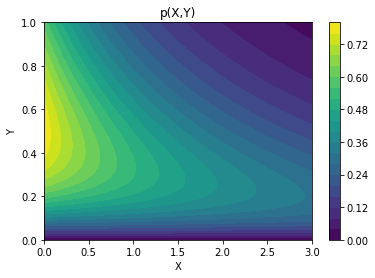

In [99]:
X,Y = np.meshgrid(np.linspace(0,3,301),np.linspace(0,3,301))

Func = lambda x,y: c*fxy(x,y)

Z = Func(X,Y)

plt.figure()
CS = plt.contourf(X,Y,Z,20)
plt.colorbar()
plt.ylim([0,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('p(X,Y)')
plt.show()

###Cálculo de probabilidad

Se pide calcular ahora la probabilidad de que `X` sea menor a `1` e `Y` sea menor a `2`. No es más que cambiar los límites de integración!

$$P(X\leq 1,Y\leq 2)=\int_{0}^{2} \int_{0}^{1} p_{xy}(x,y)\ dx\ dy$$

In [100]:
xmin,xmax,ymin,ymax = 0,1,0,2
PXY,error = dblquad(lambda x ,y: fxy(x,y),xmin,xmax,ymin,ymax)
PXY *= c

print('P(x<=2, y<=1) = {}'.format(PXY))

P(x<=2, y<=1) = 0.7998601072893


###Funciones marginales

Veamos ahora cuánto valen p(x) y p(y), que consiste en integrar en una sola dimensión

$$p_{x}(x) = \int_{-\infty}^{\infty}p_{xy}(x,y)dy$$

$$p_{y}(y) = \int_{-\infty}^{\infty}p_{xy}(x,y)dx$$

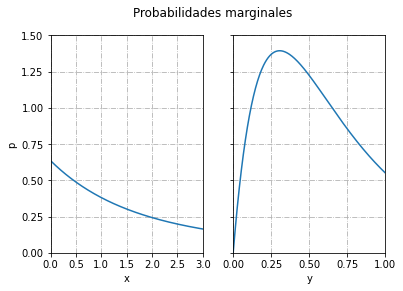

In [103]:
# Función marginal de x
def fx(x):
  sol = np.zeros(x.shape)
  for x1 in np.ndindex(x.shape):
    PXY, error = quad(lambda y : fxy(x[x1],y),0,1)
    sol[x1] = PXY*c
  return sol

# Función marginal de y
def fy(y):
  sol = np.zeros(y.shape)
  for y1 in np.ndindex(y.shape):
    PXY, error = quad(lambda x : fxy(x,y[y1]),0,3)
    sol[y1] = PXY*c
  return sol

# Calculos para plotear
x = np.linspace(0,3,301)
fxx = fx(x)

#Calculos para plotear
y = np.linspace(0,1,301)
fyy = fy(y)

# Crear grafico
fig,axs = plt.subplots(1,2,sharey=True)
#grafico 1
axs[0].plot(x,fxx)
axs[0].set_ylim([0,1.5])
axs[0].set_yticks(np.linspace(0,1.5,7))
axs[0].set_xlabel('x')
axs[0].set_ylabel('p')
axs[0].set_xlim([0,3])
axs[0].set_xticks(np.linspace(0,3,7))
axs[0].grid(linestyle='-.',axis='both')
#grafico 2
axs[1].set_xlabel('y')
axs[1].set_xlim([0,1])
axs[1].set_xticks(np.linspace(0,1,5))
axs[1].grid(linestyle='-.',axis='both')
axs[1].plot(y,fyy)
#finalizando
fig.suptitle('Probabilidades marginales')
plt.show()

###Correlación entre las variables X e Y

Si las variables aleatorias fuesen independientes entre sí, entonces el producto de la distribuciones marginales sería igual a la función de probabilidad conjunta. Veamos si es cierto!

$$p_{xy}=p_{x} \cdot p_{y} →X,Y independientes$$

Aviso: no es el código más eficiente.

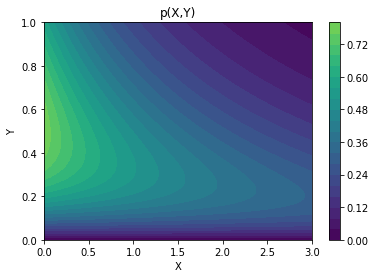

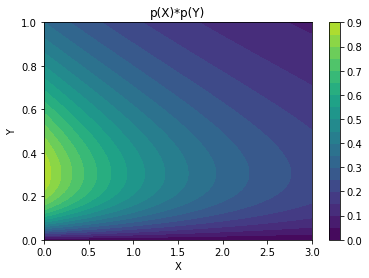

In [104]:
def fxfy(x,y):
  return fx(x)*fy(y)

X,Y = np.meshgrid(np.linspace(0,3,301),np.linspace(0,3,301))

Func = lambda x,y: c*fxy(x,y)
Func2 = lambda x,y: fxfy(x,y)

Z = Func(X,Y)
Z2 = Func2(X,Y)

plt.figure()
CS = plt.contourf(X,Y,Z,20)
plt.colorbar()
plt.ylim([0,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.clim([0,1])
plt.title('p(X,Y)')
plt.show()

plt.figure()
CS = plt.contourf(X,Y,Z2,20)
plt.colorbar()
plt.ylim([0,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.clim([0,1])
plt.title('p(X)*p(Y)')
plt.show()

A simple vista se nota que no son iguales, por lo que `X`e `Y` no son independientes.

###Cálculo de probabilidad condicionada

Para cerrar, calculemos la probabilidad de que `Y>0.7` dado que `X=2`.

$$P(Y>0.7|X=2) = \frac{P(X=2,Y>0.7)}{P(X=2)}=\frac{\int_{0.7}^{1}p_{xy}(2,y)dy}{p_{x}(2)}$$

In [105]:
x = np.array(2.)
ymin,ymax = 0.7,1

# P(X=2,Y>0.7)
P1,error = quad(lambda y: fxy(x,y),ymin,ymax)
P1 *= c
# P(X=2)
P2 = fx(x) 

# P(Y>0.7|X=2)
Solution = P1/P2
print('P(Y>0.7|X=2) = {}'.format(Solution))

P(Y>0.7|X=2) = 0.1535630724393783


##Ejercicio 2: Definición de PGA de diseño

La máxima aceleración $a$ en el sitio debido a un sismo de magnitud $M$ con epicentro a una distancia $R$ puede ser evaluada a partir de una ley de atenuación calibrada para el sitio:

$a = b_{1} e^{b_{2}M} R^{b_{3}}$

Aún asumiendo que el modelo es determinístico (no hay incertidumbre en los parámetros $b$ ni en la forma de la ecuación), la magnitud del sismo $M$ y la distancia al epicentro $R$ son variables aleatorias.

Asumiendo que el máximo sismo en 50 años $M$ responde a una Gumbel (de paso vemos cómo es) con media 7 y desvío estándar 1.5 y que la distancia $R$ es una distribución uniforme entre 60 y 80 km, encuentre el valor de aceleración $a$ con período de retorno 475 años. (probabilidad 1/475 de ser superado en cada año)

Para resolver este problema, en vez de buscar una solución analítica (no la hay), vamos a simular valores de M y R y construir empíricamente la función de distribución.

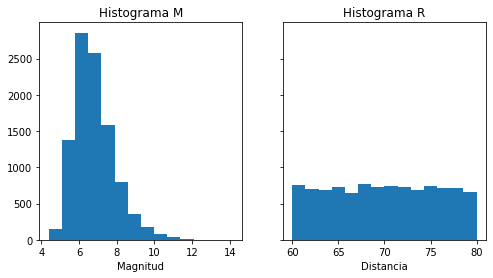

In [106]:
# Número de muestras
Nsample = 10000

# Modelo para M
mu, sigma = 7, 1.5
# Parametros
a = np.pi/np.sqrt(6)/sigma
b = mu - np.euler_gamma/a
Mmodel = st.gumbel_r(b,a)

# Modelo para R
xi, xf = 60, 80
Rmodel = st.uniform(xi,xf-xi)

# Simular valores
Mvals = Mmodel.rvs(Nsample)
Rvals = Rmodel.rvs(Nsample)

#bins
nbins = int(log2(Nsample)+1) # Regla de Sturge

# Ver histogramas
fig, axs = plt.subplots(1, 2, figsize=(8,4), sharey=True)

axs[0].hist(Mvals, bins=nbins)
axs[0].set_title('Histograma M')
axs[0].set_xlabel('Magnitud')

axs[1].hist(Rvals, bins=nbins)
axs[1].set_title('Histograma R')
axs[1].set_xlabel('Distancia')

plt.show()

La simulación de las variables se ve bien, así que podemos ahora hacer lo mismo para $a$

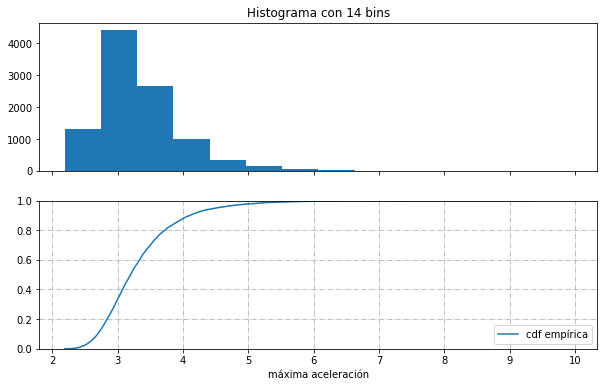

In [107]:
# Parametros regresión
b1,b2,b3 = 23, 0.15, 0.7

# Aplicamos la regresion
avals = b1*np.exp(b2*Mvals)*Rvals**(-b3)

fig,ax = plt.subplots(2,1,figsize=(10,6),sharex=True)
ax[0].hist(avals, bins=nbins)
ax[0].set(title='Histograma con {} bins'.format(nbins))
ax[1].set_xlabel('máxima aceleración')

# Quedarse con los valores distintos del dataset, y ordenarlos de menor a mayor
UniData = np.sort(np.unique(avals))
UniData = np.reshape(UniData,(1,-1))

# Rescribir el dataset en forma de columnas
Data = np.reshape(avals,(-1,1))

# Calcular cuantos valores del Dataset se encuentran por debajo de cada valor de
# UniData
CDF = np.sum(Data<=UniData,0)/len(Data)
xdata = np.reshape(UniData,(-1,))

# Graficar función empírica como función escalonada
ax[1].step(xdata,CDF,label = 'cdf empírica')
ax[1].set_ylim([0,1])
ax[1].grid(linestyle='-.', axis='both')
ax[1].legend(loc=4)
plt.show()

La curva que encontramos arriba en forma empírica es para la máxima aceleración en 50 años. Tenemos que econtrar ahora el valor con período de retorno 475 años (es una excedencia anual). La relación es:

$\frac{1}{475}=1-P_{1}(a)=1-\sqrt[50]{P_{50}(a)}$

de donde sale que buscamos el valor de a tal que

$P_{50}(a) = \left(1-\frac{1}{475}\right)^{50}$

A fines prácticos, podemos buscar el índice de la CDF más cercano al valor de arriba, y luego tomar el valor de $a$ asociado.

In [108]:
# Probabilidad buscada
P50 = (1-1/475)**50

# Encontrar el valor más cercano en nuestra CDF experimental
idx = (np.abs(CDF - P50)).argmin()
Solution = xdata[idx]


print('a475:',Solution, 'm/s^2')

a475: 4.106351337438488 m/s^2
